## V16 Rutherford Streuversuch

In [1]:
%config InlineBackend.figure_formats = ['svg']

from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df 
import scipy.constants as const
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['figure.constrained_layout.use']=True
plt.rcParams['legend.frameon']=False
plt.rcParams["xtick.minor.visible"]=True
plt.rcParams["ytick.minor.visible"]=True

#### Aktivität zum Zeitpunkt der Messung berechnen

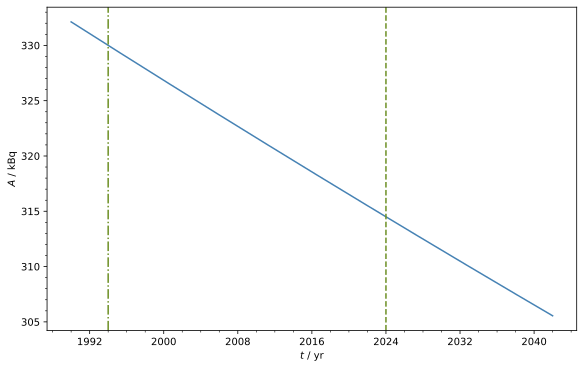

A(1994) = 330.000$ kBq
A(2024) = 314.499$ kBq


In [2]:
def decay(T_yr):
    T_12_yr = 432.2
    A_Bq = 330e3
    return A_Bq * 2**( (1994 - T_yr) / T_12_yr)

t = np.linspace(1990, 2042, 1000)

plt.plot(t, decay(t) / 1e3, c='steelblue')
plt.axvline(1994, ls='-.', c='olivedrab')
plt.axvline(2024, ls='--', c='olivedrab')

plt.xticks(np.arange(1992, 2042, 8))

plt.xlabel('$t$ / yr')
plt.ylabel('$A$ / kBq')

plt.show()
plt.close()

print(f'A(1994) = {decay(1994) / 1e3:.3f}$ kBq')
print(f'A(2024) = {decay(2024) / 1e3:.3f}$ kBq')

$$^{241}_{95}\text{Am} \rightarrow ^{237}_{93}\text{Np} + ^4_2\text{He} + E_\alpha
\qquad E_\alpha = 5.486 \text{ MeV}$$

#### Theoretische Werte für den Energieverslust nach der Bethe-Bloch Formel

$$-\frac{dE_\alpha}{dx} = \frac{e^4 z^2 NZ}{4 \pi m_e v_\alpha^2 \varepsilon_0^2} \, \ln\left( \frac{2 m_e v_\alpha^2}{I} \right)
= \frac{e^4 m_\alpha z^2 NZ}{8 \pi m_e E_\alpha \varepsilon_0^2} \, \ln\left( \frac{4 m_e E_\alpha}{I m_\alpha} \right) $$

$$R_\alpha = \int_0^{E_\alpha} \left( -\frac{dE_\alpha}{dx} \right)^{-1} dE_\alpha
= \frac{8 \pi m_e E_\alpha^2 \varepsilon_0^2}{e^4 m_\alpha z^2 N Z \ln (4 m_e E_\alpha / I m_\alpha)}
= \frac{2 \pi m_e m_\alpha v_\alpha^4 \varepsilon_0^2}{e^4 z^2 N Z \ln (2 m_e v_\alpha^2 / I)}$$

#### Berechnung der Teilchenzahlen und Dichten für Luft und Gold

$$\begin{align*}
Z_{N_2} &= 7 & Z_{O_2} &= 8 & Z_L &= \tfrac{78}{99} Z_{N_2} + \tfrac{21}{99} Z_{O_2} = 7.21 \\
M_{N_2} &= 2 \cdot 14.01 \text{ g/mol} & M_{O_2} &= 2 \cdot 16.00 \text{ g/mol}
& M_L &= \tfrac{78}{99} M_{N_2} + \tfrac{21}{99} M_{O_2} = 28.86 \text{ g/mol} \\
\rho_{N_2} &= 1165 \text{ g/m}^3 & \rho_{O_2} &= 1332 \text{ g/m}^3
& \rho_L &= \tfrac{78}{99} \rho_{N_2} + \tfrac{21}{99} \rho_{O_2} = 1200 \text{ g/m}^3 \\
\end{align*}$$

$$\begin{align*}
M_G = 196.67 \text{ g/mol} && \rho_G = 19320 \text{ g/m}^3 \\
\end{align*}$$

$$\begin{align*}
N_L &= N_A \frac{\rho_L}{M_L} = 250 \cdot 10^{23} \text{ m}^{-3} \\
N_G &= N_A \frac{\rho_G}{M_G} = 591000 \cdot 10^{23} \text{ m}^{-3}
\end{align*}$$

#### Druckabhängige Reichweite von Alphastrahlung in Luft

$$\rho = \frac{p}{RT} \qquad R_\alpha \propto p^{-1}$$

In [3]:
A = (const.e**4 * 6.645e-27 * 2**2 * 250 * 10**23 * 7.21 *
     np.log(4 * const.m_e * 5.486e6 * const.e / (72.1 * const.e * 6.645e-27)))
B = 8 * np.pi * const.m_e * 5.486e6 * const.e * const.epsilon_0**2

dEdx = A / B

print(f'dE/dx = {dEdx:.3} J / m = {dEdx / const.e:.3} eV / m')
print('')

a = 8 * np.pi * const.m_e * (5.486e6 * const.e)**2 * const.epsilon_0**2
b = (const.e**4 * 6.645e-27 * 2**2 * 250 * 10**23 * 7.21 *
     np.log(4 * const.m_e * 5.486e6 * const.e / (72.1 * const.e * 6.645e-27)))

R = a / b

print(f'R =  {R:.3f} m bei p = 1000 mbar')
print(f'R =  1.000 m bei p =  118 mbar')
print(f'R = 10.000 m bei p =   12 mbar')

dE/dx = 7.47e-12 J / m = 4.66e+07 eV / m

R =  0.118 m bei p = 1000 mbar
R =  1.000 m bei p =  118 mbar
R = 10.000 m bei p =   12 mbar


#### Einfluss elektronischer Bauteile auf Impulse

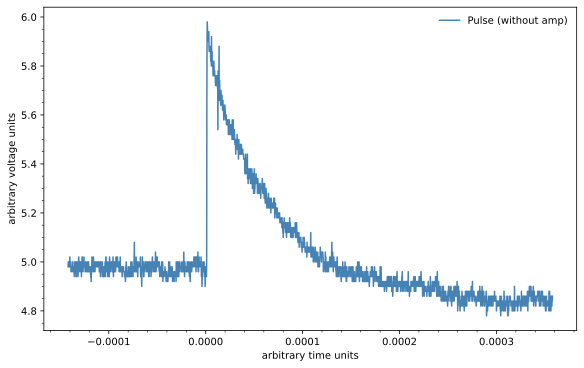

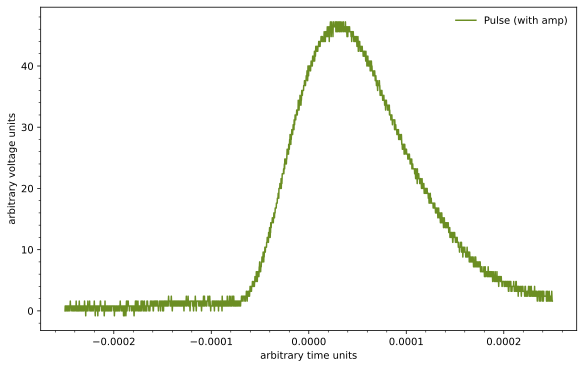

In [4]:
without_amp_x, without_amp_y = np.genfromtxt('data/altprotokoll/without_amp.txt', unpack=True)
with_amp_x, with_amp_y = np.genfromtxt('data/altprotokoll/with_amp.txt', unpack=True)

plt.plot(1e0 * without_amp_x, without_amp_y, c='steelblue', label='Pulse (without amp)')

plt.xlabel('arbitrary time units')
plt.ylabel('arbitrary voltage units')

plt.legend()

plt.show()
plt.close()

plt.plot(1e2 * with_amp_x, with_amp_y, c='olivedrab', label='Pulse (with amp)')

plt.xlabel('arbitrary time units')
plt.ylabel('arbitrary voltage units')

plt.legend()

plt.show()
plt.close()

#### Lineare Ausgleichsrechnung zur Bestimmung der Filmdicke

Ohne Folie:


"$p \text{ / mbar}\,$",$U \text{ / V}\;\;$
0.0,12.1
7.9,11.8
18.5,11.5
35.1,10.8
55.7,9.6
88.8,8.9
119.8,8.2
151.4,6.7
181.6,5.2
210.1,4.4



Mit Folie:


"$p \text{ / mbar}\,$",$U \text{ / V}\;\;$
0.0,9.8
7.9,9.5
18.5,8.8
35.1,8.3
55.7,7.8
88.8,6.1
119.8,5.2
151.4,4.3
181.6,3.1
210.1,2.7


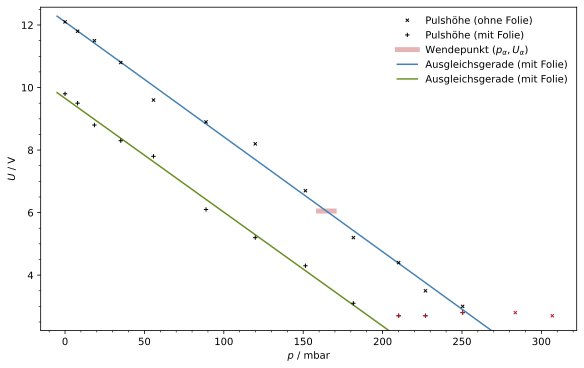

Ohne Folie:
a = -0.0368+/-0.0008   b = 12.10+/-0.12

Mit Folie:
a = -0.0364+/-0.0010   b = 9.65+/-0.10



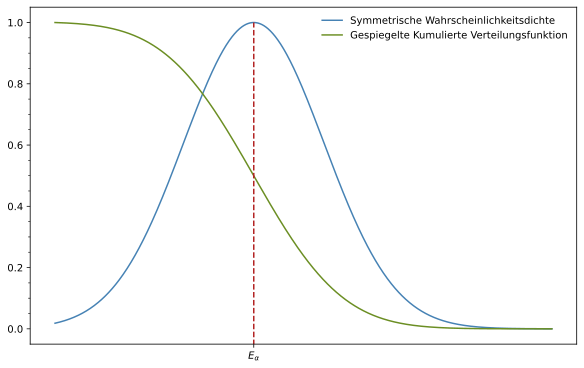

In [5]:
of_p, of_U = np.genfromtxt('data/ohne_folie.txt', unpack=True)
mf_p, mf_U = np.genfromtxt('data//mit_folie.txt', unpack=True)

of_df = df({r'$p \text{ / mbar}\,$':of_p, r'$U \text{ / V}\;\;$':of_U})
mf_df = df({r'$p \text{ / mbar}\,$':mf_p, r'$U \text{ / V}\;\;$':mf_U})

print('Ohne Folie:')
display(of_df.style.hide().format('{:.1f}'))
print('')
print('Mit Folie:')
display(mf_df.style.hide().format('{:.1f}'))

of_par, of_cov = np.polyfit(of_p[:-2], of_U[:-2], deg=1, cov=True)
of_err = np.sqrt(np.diag(of_cov))
of_par = uar(of_par, of_err)

mf_par, mf_cov = np.polyfit(mf_p[:-3], mf_U[:-3], deg=1, cov=True)
mf_err = np.sqrt(np.diag(mf_cov))
mf_par = uar(mf_par, mf_err)

of = np.linspace(-5, 270, 1000)
mf = np.linspace(-5, 210, 1000)

def lin(x, a, b):
    return a * x + b

def um(y, a, b):
    return (y - b) / a

Ua = np.max(of_U) / 2
pa = um(Ua, *of_par)

plt.plot(of_p[:-2], of_U[:-2], 'kx', ms=3.21, label='Pulshöhe (ohne Folie)', zorder=10)
plt.plot(of_p[-2:], of_U[-2:], 'x', ms=3.21, c='firebrick', zorder=10)

plt.plot(mf_p, mf_U, 'k+', ms=4.32, label='Pulshöhe (mit Folie)', zorder=10)
plt.plot(mf_p[-3:], mf_U[-3:], '+', ms=4.32, c='firebrick', zorder=10)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([pa.n - pa.s, pa.n + pa.s], [Ua, Ua], lw=5, c='firebrick', alpha=1/3,
         label=r'Wendepunkt $(p_\alpha, U_\alpha)$')

plt.plot(of, lin(of, *noms(of_par)), c='steelblue', label=f'Ausgleichsgerade (mit Folie)')

plt.plot(mf, lin(mf, *noms(mf_par)), c='olivedrab', label=f'Ausgleichsgerade (mit Folie)')

plt.xlabel('$p$ / mbar')
plt.ylabel('$U$ / V')

plt.legend()

plt.show()
plt.close()

fmt_str = 'a = {0:.4f}   b = {1:.2f}\n'
print('Ohne Folie:')
print(fmt_str.format(*of_par))
print('Mit Folie:')
print(fmt_str.format(*mf_par))

Earr = np.linspace(1, 11, 1000)
Ea = 5
pdf = np.exp(-(Earr - Ea)**2 / 4)
cdf = 1 - np.cumsum(pdf) / np.sum(pdf)

plt.plot(Earr, pdf, c='steelblue', label='Symmetrische Wahrscheinlichkeitsdichte')
plt.plot(Earr, cdf, c='olivedrab', label='Gespiegelte Kumulierte Verteilungsfunktion')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([Ea, Ea], [-10, 1], '--', c='firebrick')

plt.gca().set_xticks([5])
plt.gca().set_xticklabels([r'$E_\alpha$'])

plt.legend()

plt.show()
plt.close()

Unter der Annahme einer zugrundeliegenden symmetrischen Energieverteilung muss bei der halben Maximalamplitude $U_\alpha$ ein Wendepunkt liegen, wobei der zugehörige Druck $p_\alpha \propto E_\alpha$ ist. Das folgt daraus, dass ein höherer Druck niedrigere Energien filtert. Die Druckkurve repräsentiert also eine Art kumulierte Verteilung, deren Plateau bei $p = 0$ das Maximum angibt und die sich um $p = p_\alpha$ gut linear nähern lässt. Aus dem horizontalen Abstand $\Delta p$ lässt sich dann der Energieverlust $\Delta E$ an der Goldfolie berechnen. Bei der durchgeführten Messung ist es wahrscheinlicher, dass der abflachende Verlauf aus dem Rauschen resultiert und keine direkte Konsequenz der Asymptote für $p = \infty$ ist. Einzelne Amplitudenwerte sschwanken teils sehr stark.

In [6]:
dp = um(Ua, *of_par) - um(Ua, *mf_par)

Ea = 5.486e6

dE = Ea * dp / pa

ad = 8 * np.pi * const.m_e * Ea * const.e * const.epsilon_0**2
bd = (6.6446573357e-27 * const.e**4 * 5.9e28 * 2**2 * 79 *
      np.log(4 * const.m_e * Ea * const.e / (6.6446573357e-27 * 790 * const.e)))
d = dE * const.e * ad/bd

dU = lin(pa, *of_par) - lin(pa, *mf_par)

dEE = Ea * dU / Ua

add = 8 * np.pi * const.m_e * Ea * const.e * const.epsilon_0**2
bdd = (6.6446573357e-27 * const.e**4 * 5.9e28 * 2**2 * 79 *
       np.log(4 * const.m_e * Ea * const.e / (6.6446573357e-27 * 790 * const.e)))
dd = dEE * const.e * add/bdd

print(f'Ua = {Ua:.2f} V')
print(f'pa = {pa:.0f} mbar')
print(f'dp = {dp:.0f} mbar')
print(f'Ea = {Ea / 1e6:.1f} MeV')
print(f'dE = {dE / 1e6:.1f} MeV')
print(f'd = {d * 1e6:.1f} um')

Ua = 6.05 V
pa = 165+/-5 mbar
dp = 66+/-6 mbar
Ea = 5.5 MeV
dE = 2.2+/-0.2 MeV
d = 5.1+/-0.4 um


$$\begin{align*}
U &= a \cdot p + b & p &= \frac{U - b}{a} & \Delta E = E_\alpha \, \frac{\Delta p}{p_\alpha}
\end{align*}$$

$$d = \Delta x_\alpha = \Delta E_\alpha \frac{4\pi m_e v_\alpha^2 \varepsilon_0^2}{e^4 N z^2 Z \ln (2m_e v_\alpha^2 / I)}
= \Delta E_\alpha \frac{8\pi m_e E_\alpha \varepsilon_0^2}{m_\alpha e^4 N z^2 Z \ln (4m_e E_\alpha / m_\alpha I)}$$

### Untersuchung der winkelabhängigen Zählrate mittels Rutherfordscher Streuformel

Zählrate:


$\theta \text{ / °}$,$t \text{ / s}$,$\mathscr{C}$,$C \text{ / s}^{-1}$
-0.6,200,2033,10.16+/-0.23
-0.4,200,2147,10.73+/-0.23
-0.2,200,2227,11.13+/-0.24
0.0,200,2236,11.18+/-0.24
0.2,200,2295,11.47+/-0.24
0.4,200,2301,11.51+/-0.24
0.6,200,2307,11.54+/-0.24
0.8,200,2407,12.04+/-0.25
1.0,200,2294,11.47+/-0.24
1.5,200,2352,11.76+/-0.24


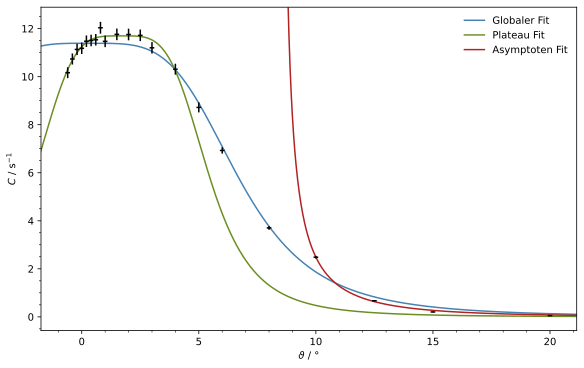

Globaler Fit:
a = (1.135382+/-0.396025)e-04   b = (3.125227+/-5.258338)e-01   c = (9.968336+/-3.448265)e-06   

Plateau Fit:
a = (1.360653+/-0.140627)e-05   b = (1.689110+/-0.047508)e+00   c = (1.163101+/-0.123669)e-06   

Asymptoten Fit:
a = (7.022703+/-inf)e-05   b = (1.632319+/-inf)e-09   c = (-2.944577+/-inf)e-05   



In [7]:
ang, c, t = np.genfromtxt('data/winkel.txt', unpack=True)
C = uar(c / t, np.sqrt(c) / t)

ang_df = df({r'$\theta \text{ / °}$': ang, r'$t \text{ / s}$': t.astype(int),
             r'$\mathscr{C}$': c.astype(int), r'$C \text{ / s}^{-1}$': C})

print('Zählrate:')
display(ang_df.style.hide().format({r'$\theta \text{ / °}$': '{:.1f}'}))


def ruth(phi, a, b, c):
    return a / (np.sin((phi - b) * np.pi / 360)**4 + c)

par_1, cov_1 = fit(ruth, ang, noms(C), p0=[1e-3, 1e-0, 1e-6])
err_1 = np.sqrt(np.diag(cov_1))
par_1 = uar(par_1, err_1)

par_2, cov_2 = fit(ruth, ang[:14], noms(C[:14]), p0=[1e-3, 1e-0, 1e-6])
err_2 = np.sqrt(np.diag(cov_2))
par_2 = uar(par_2, err_2)

par_3, cov_3 = fit(ruth, ang[-4:], noms(C[-4:]), p0=[1e-0, 1.632319283549143e-9, 1e-6])
err_3 = np.sqrt(np.diag(cov_3))
par_3 = uar(par_3, err_3)

th = np.linspace(-2.6, 22, 1000)

plt.errorbar(ang, noms(C), xerr=np.full_like(C, 0.1), yerr=stds(C), fmt='k,', ms=0, zorder=10)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot(th, ruth(th, *noms(par_1)), c='steelblue', label='Globaler Fit')
plt.plot(th, ruth(th, *noms(par_2)), c='olivedrab', label='Plateau Fit')
plt.plot(th[450:], ruth(th[450:], *noms(par_3)), c='firebrick', label='Asymptoten Fit')

plt.xlabel(r'$\vartheta$ / °')
plt.ylabel(r'$C$ / s$^{-1}$')

plt.legend()

plt.show()
plt.close()

fmt_str = 'a = {0:.6e}   b = {1:.6e}   c = {2:.6e}   \n'
print('Globaler Fit:')
print(fmt_str.format(*par_1))
print('Plateau Fit:')
print(fmt_str.format(*par_2))
print('Asymptoten Fit:')
print(fmt_str.format(*par_3))

$$\begin{align*}
C(\vartheta) &= \frac{a}{\sin^4 \bigl( \tfrac{1}{2}(\vartheta - b) \bigr) + c} &
C &= \frac{\mathscr{C}}{t} & \Delta C &= \frac{\sqrt{\mathscr{C}\,}}{t} \\
\frac{d\sigma}{d\Omega} &= \frac{z^2 Z^2 e^4}{256\pi^2 \varepsilon_0^2 E_\alpha^2 \sin^4(\vartheta / 2)} &
\sigma &= \frac{C}{A}\frac{F}{\mathscr{N}} & \mathscr{N} &= NV
\end{align*}$$

Hier wird eine modifizierte $C(\vartheta) \propto \sin^{-4} (\vartheta / 2)$ Anhängigkeit angewandt. Der Parameter $a$ gibt die Asymptote an und skaliert den abgeflachten Peak, der zu $b$ verschoben ist und durch $c$ anstatt einer Singularität erzeugt wird. Zum Plateau Fit werden die ersten 14 Datenpunkte, für den Asymptoten Fit die letzten 4 verwendet. Letzterer zeigt keine stabile Konvergenz, sodass die Kovarianz nicht geschätzt werden kann. Die Modifikationen erreichen zwar zumindest lokal zufriedenstellend geringe Abweichungen der Fits, können aber nicht den vollständigen Verlauf reproduzieren. Das liegt daran, dass der Strahl eine endliche Breite hat, die nicht vernachlässigt werden darf. Es müsst also eigentlich für jeden Winkel über ein passendes Winkelintervall integriert werden, oder der Aufbau müsste eine schmalere Blende beziehungsweise einen größeren Abstand zum Detektor verwenden.